In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn
import pickle

from model_evaluation import metricsRegression

RANDOM_STATE = 42
TRAINING_PORTITION = .8

## Getting data from pickle files dumped in notebook 1

In [3]:
with open("random_reviews.p","rb") as f:
    random_reviews = pickle.load( f )

with open("bow1000.p","rb") as f:
    bow1000 = pickle.load( f )

### Split the array into a training and test sets: 800 first rows for the training set and 200 last rows for testing.

In [4]:
train_data, test_data = bow1000.head(800), bow1000.tail( len(bow1000) - 800)

test_data.describe()

,able,absolutely,accommodating,across,actually,add,added,additional,advice,afternoon,ago,ahead,air,allowed,almost,alone,along,already,also,although,always,amazing,ambiance,amount,another,answer,answered,anymore,anyone,anything,anyway,anywhere,apart,appetizer,appetizers,appointment,appreciate,area,around,arrived,...,weekend,weeks,weird,well,went,west,whatever,whether,white,whole,wife,willing,wine,wings,wish,within,without,woman,wonderful,word,work,worked,working,world,worse,worst,worth,would,wow,write,writing,wrong,year,years,yelp,yes,yet,young,yum,yummy
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.00000,200.00000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.040000,0.040000,0.010000,0.015000,0.055000,0.005000,0.005000,0.005000,0.020000,0.030000,0.030000,0.025000,0.005000,0.0,0.060000,0.015000,0.02500,0.040000,0.235000,0.045000,0.165000,0.125000,0.030000,0.030000,0.065000,0.005000,0.020000,0.020000,0.035000,0.035000,0.020000,0.005000,0.015000,0.020000,0.020000,0.050000,0.025000,0.050000,0.070000,0.030000,...,0.020000,0.020000,0.015000,0.125000,0.150000,0.010000,0.005000,0.02500,0.020000,0.015000,0.03500,0.005000,0.055000,0.010000,0.040000,0.005000,0.075000,0.010000,0.055000,0.005000,0.065000,0.015000,0.030000,0.005000,0.010000,0.0,0.065000,0.26500,0.02500,0.010000,0.0,0.045000,0.015000,0.050000,0.030000,0.020000,0.020000,0.025000,0.015000,0.035000
std,0.196451,0.220552,0.099748,0.121857,0.249572,0.070711,0.070711,0.070711,0.172478,0.171015,0.171015,0.156517,0.070711,0.0,0.277099,0.121857,0.18587,0.196451,0.566906,0.230741,0.456967,0.374266,0.171015,0.198233,0.266703,0.070711,0.140351,0.140351,0.184241,0.184241,0.172478,0.070711,0.121857,0.140351,0.140351,0.313033,0.156517,0.218492,0.274731,0.171015,...,0.172478,0.140351,0.121857,0.346374,0.422365,0.099748,0.070711,0.18587,0.172478,0.121857,0.20975,0.070711,0.268955,0.099748,0.196451,0.070711,0.282443,0.099748,0.268955,0.070711,0.266703,0.121857,0.171015,0.070711,0.099748,0.0,0.266703,0.57132,0.18587,0.099748,0.0,0.207824,0.121857,0.218492,0.222141,0.140351,0.140351,0.156517,0.157796,0.184241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0

In [5]:
train_data.describe()

,able,absolutely,accommodating,across,actually,add,added,additional,advice,afternoon,ago,ahead,air,allowed,almost,alone,along,already,also,although,always,amazing,ambiance,amount,another,answer,answered,anymore,anyone,anything,anyway,anywhere,apart,appetizer,appetizers,appointment,appreciate,area,around,arrived,...,weekend,weeks,weird,well,went,west,whatever,whether,white,whole,wife,willing,wine,wings,wish,within,without,woman,wonderful,word,work,worked,working,world,worse,worst,worth,would,wow,write,writing,wrong,year,years,yelp,yes,yet,young,yum,yummy
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.035000,0.038750,0.010000,0.017500,0.038750,0.020000,0.022500,0.011250,0.007500,0.012500,0.03500,0.011250,0.017500,0.012500,0.051250,0.016250,0.016250,0.035000,0.222500,0.023750,0.172500,0.13875,0.016250,0.018750,0.067500,0.011250,0.017500,0.013750,0.031250,0.038750,0.017500,0.015000,0.010000,0.011250,0.017500,0.015000,0.010000,0.062500,0.107500,0.030000,...,0.025000,0.021250,0.011250,0.166250,0.155000,0.010000,0.011250,0.006250,0.026250,0.041250,0.026250,0.015000,0.027500,0.037500,0.033750,0.020000,0.042500,0.010000,0.031250,0.015000,0.092500,0.022500,0.023750,0.021250,0.010000,0.032500,0.068750,0.285000,0.016250,0.012500,0.012500,0.035000,0.040000,0.068750,0.033750,0.025000,0.026250,0.011250,0.011250,0.025000
std,0.183895,0.193119,0.099561,0.131207,0.205673,0.140088,0.156603,0.105534,0.086331,0.121911,0.20329,0.105534,0.217377,0.121911,0.226246,0.144956,0.126515,0.215251,0.575245,0.152365,0.517763,0.46880,0.126515,0.135726,0.279359,0.116793,0.140422,0.126811,0.174101,0.217503,0.140422,0.121628,0.099561,0.105534,0.140422,0.149341,0.111425,0.280521,0.358615,0.184777,...,0.171499,0.144307,0.116793,0.483636,0.440133,0.099561,0.116793,0.078859,0.159978,0.233702,0.174926,0.121628,0.185166,0.348203,0.180698,0.156942,0.225294,0.111425,0.194475,0.131517,0.402052,0.164401,0.167992,0.144307,0.099561,0.197465,0.285702,0.625911,0.144956,0.140956,0.121911,0.215251,0.220138,0.281287,0.245329,0.164039,0.159978,0.116793,0.116793,0.185521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000

### fit (learn) a model on the training set by using features (BoW and other features such as funny) to predict the label (“useful" column). Then use the fitted model to predict the “useful" for the test set. Try one or two regression method(s), use plots to show your results. Observe and analyze methods and results.


In [13]:
# Combining two dataframes to one
joined_df = pd.concat([random_reviews.add_prefix("random_reviews_"),bow1000], axis=1)

# Checking number of NaN - no columns with NaN
s = joined_df.isna().sum()
print("Columns with non-zero number of nan: ",s[s != 0])

Columns with non-zero number of nan:  Series([], dtype: int64)


In [0]:
# Splitting to training and test and separating predictors from labels
features, labels = joined_df.drop(['random_reviews_useful','random_reviews_business_id','random_reviews_review_id','random_reviews_text','random_reviews_user_id','random_reviews_date'], axis=1), joined_df['random_reviews_useful']






In [15]:
features.head(10)

,random_reviews_cool,random_reviews_funny,random_reviews_stars,able,absolutely,accommodating,across,actually,add,added,additional,advice,afternoon,ago,ahead,air,allowed,almost,alone,along,already,also,although,always,amazing,ambiance,amount,another,answer,answered,anymore,anyone,anything,anyway,anywhere,apart,appetizer,appetizers,appointment,appreciate,...,weekend,weeks,weird,well,went,west,whatever,whether,white,whole,wife,willing,wine,wings,wish,within,without,woman,wonderful,word,work,worked,working,world,worse,worst,worth,would,wow,write,writing,wrong,year,years,yelp,yes,yet,young,yum,yummy
0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis




modelsToTest=[
  # ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
  ("LinearRegression", sklearn.linear_model.LinearRegression(), 0.5),
  # ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
  # # ("Perceptron", sklearn.linear_model.Perceptron()),
  # # ("KNeighborsClassifier", KNeighborsClassifier(3)),
  ("SVM regressor - linear", LinearSVR()), 
  ("SVM regressor - RBF kernel", SVR(kernel='rbf')),
  # # ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
  ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=10,min_samples_split=20)),
  ("RandomForestRegressor",RandomForestRegressor(n_estimators=1000)),
  # # ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
  ("AdaBoostRegressor", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100)),
  # # ("GaussianNB", GaussianNB()),
  # # #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis())
]

In [17]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# X_train = train_padded
# y_train = train_labels
X = np.array(features)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAINING_PORTITION, random_state=None, shuffle=False)

y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

modelsToTest=[
  # ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
  ("LinearRegression", sklearn.linear_model.LinearRegression(), 0.5),
  # ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
  # # ("Perceptron", sklearn.linear_model.Perceptron()),
  # # ("KNeighborsClassifier", KNeighborsClassifier(3)),
  ("SVM regressor - linear", LinearSVR()), 
  ("SVM regressor - RBF kernel", SVR(kernel='rbf')),
  # # ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
  ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=10,min_samples_split=20)),
  ("RandomForestRegressor",RandomForestRegressor(n_estimators=1000)),
  # # ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
  ("AdaBoostRegressor", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100)),
  # # ("GaussianNB", GaussianNB()),
  # # #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis())
]


# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)



prediction_table = testDifferentClassifiers(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, modelsToTest)
# Adding dummy guess to prediction table
prediction_table["--Average value from training data--"] = np.mean(y_train_scaled)



scores = metricsRegression(prediction_table)

scores = scores.sort_values(by=['Mean squared error'], ascending=False)
scores_basecase = scores.copy()
scores_basecase.drop(['R2 score','Explained variance'],axis=1, inplace=True)
scores_basecase.rename(columns={'Mean squared error':'MSE basecase'}, inplace=True)

#createGraphsFromScores(scores)
print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

X_train.shape: (800, 1083), y_train.shape: (800, 1)


N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:03/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50% (3 of 6) |#############             | Elapsed Time: 0:00:01 ETA:   0:00:02/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel impo

Model,Explained variance,Mean squared error,R2 score
SVM regressor - linear,-2.5,1.4,-2.5
LinearRegression,-0.22,0.56,-0.43
--Average value from training data--,0,0.39,-0.014
SVM regressor - RBF kernel,0.18,0.32,0.18
DecisionTreeRegressor,0.48,0.2,0.48
RandomForestRegressor,0.57,0.17,0.56
AdaBoostRegressor,0.63,0.15,0.62


#### Transforming a dataset with PCA and then doing regression again

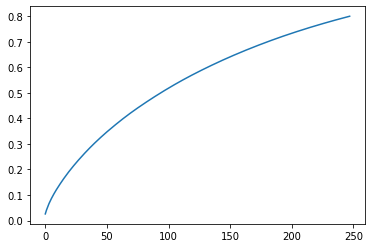

In [18]:
# PCA
pca = PCA(0.8)
pca.fit(X_train_scaled)


# Plotting how large part of variance explained
explained = pca.explained_variance_ratio_.cumsum()
plt.plot(np.arange(len(explained)),explained)
plt.show()

X_train_pca, X_test_pca = pca.transform(X_train_scaled), pca.transform(X_test_scaled)

In [19]:
prediction_table = testDifferentClassifiers(X_train_pca, X_test_pca, y_train_scaled, y_test_scaled, modelsToTest)
prediction_table["--Average value from training data--"] = np.mean(y_train_scaled)



scores = metricsRegression(prediction_table)

scores = scores.sort_values(by=['Mean squared error'], ascending=False)

scores_basecase_pca = scores.copy()
scores_basecase_pca.drop(['R2 score','Explained variance'],axis=1, inplace=True)
scores_basecase_pca.rename(columns={'Mean squared error':'MSE basecase with PCA'}, inplace=True)


#createGraphsFromScores(scores)
print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:02/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change fr

Model,Explained variance,Mean squared error,R2 score
DecisionTreeRegressor,-1.7,1.1,-1.7
LinearRegression,0.093,0.4,-0.03
--Average value from training data--,0,0.39,-0.014
AdaBoostRegressor,0.11,0.37,0.059
SVM regressor - linear,0.08,0.36,0.079
RandomForestRegressor,0.11,0.35,0.11
SVM regressor - RBF kernel,0.13,0.34,0.11


### Non-PCA testing done on data with date split to new columns

In [20]:
# Combining two dataframes to one
joined_df = pd.concat([random_reviews.add_prefix("random_reviews_"),bow1000], axis=1)

# Splitting date column into separate columns
joined_df["month"] = joined_df['random_reviews_date'].map(lambda x: x.month)
joined_df["year"] = joined_df['random_reviews_date'].map(lambda x: x.year)
joined_df["day"] = joined_df['random_reviews_date'].map(lambda x: x.day)
joined_df["weekday"] = joined_df['random_reviews_date'].map(lambda x: x.weekday())
joined_df["hour"] = joined_df['random_reviews_date'].map(lambda x: x.hour)

# Checking number of NaN - no columns with NaN
s = joined_df.isna().sum()
print("Columns with non-zero number of nan: ",s[s != 0])

Columns with non-zero number of nan:  Series([], dtype: int64)


In [0]:
# Splitting to training and test and separating predictors from labels
features, labels = joined_df.drop(['random_reviews_useful','random_reviews_business_id','random_reviews_review_id','random_reviews_text','random_reviews_user_id','random_reviews_date'], axis=1), joined_df['random_reviews_useful']






In [22]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# X_train = train_padded
# y_train = train_labels
X = np.array(features)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAINING_PORTITION, random_state=None, shuffle=False)

y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

# modelsToTest=[
#   # ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
#   ("LinearRegression", sklearn.linear_model.LinearRegression(), 0.5),
#   # ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
#   # # ("Perceptron", sklearn.linear_model.Perceptron()),
#   # # ("KNeighborsClassifier", KNeighborsClassifier(3)),
#   ("SVM regressor - linear", LinearSVR()), 
#   ("SVM regressor - RBF kernel", SVR(kernel='rbf')),
#   # # ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
#   ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=10,min_samples_split=20)),
#   ("RandomForestRegressor",RandomForestRegressor(n_estimators=100)),
#   # # ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
#   ("AdaBoostRegressor", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100)),
#   # # ("GaussianNB", GaussianNB()),
#   # # #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis())
# ]


# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)



prediction_table = testDifferentClassifiers(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, modelsToTest)
# Adding dummy guess to prediction table
prediction_table["--Average value from training data--"] = np.mean(y_train_scaled)



scores = metricsRegression(prediction_table)

scores = scores.sort_values(by=['Mean squared error'], ascending=False)

scores_datesplit = scores.copy()
scores_datesplit.drop(['R2 score','Explained variance'],axis=1, inplace=True)
scores_datesplit.rename(columns={'Mean squared error':'MSE date column split'}, inplace=True)

#createGraphsFromScores(scores)
print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

X_train.shape: (800, 1084), y_train.shape: (800, 1)


N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:03/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50% (3 of 6) |#############             | Elapsed Time: 0:00:01 ETA:   0:00:02/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel impo

Model,Explained variance,Mean squared error,R2 score
SVM regressor - linear,-2.5,1.4,-2.6
LinearRegression,-0.11,0.51,-0.3
--Average value from training data--,0,0.39,-0.014
SVM regressor - RBF kernel,0.18,0.32,0.18
DecisionTreeRegressor,0.38,0.24,0.38
RandomForestRegressor,0.59,0.16,0.59
AdaBoostRegressor,0.65,0.14,0.64


### Further testing - splitting cyclical data into sin and cos time

In [23]:
# Combining two dataframes to one
joined_df = pd.concat([random_reviews.add_prefix("random_reviews_"),bow1000], axis=1)

# Splitting date column into separate columns
joined_df["month"] = joined_df['random_reviews_date'].map(lambda x: x.month)
joined_df["year"] = joined_df['random_reviews_date'].map(lambda x: x.year)
joined_df["day"] = joined_df['random_reviews_date'].map(lambda x: x.day)
joined_df["weekday"] = joined_df['random_reviews_date'].map(lambda x: x.weekday())
joined_df["seconds"] = joined_df['random_reviews_date'].map(lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second)

# Splitting seconds into 24h sin and cos time
# Taken from https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
seconds_in_day = 24*60*60
joined_df['sin_time'] = np.sin(2*np.pi*joined_df["seconds"]/seconds_in_day)
joined_df['cos_time'] = np.cos(2*np.pi*joined_df["seconds"]/seconds_in_day)

weekdays_in_week = 7
joined_df['sin_weekday'] = np.sin(2*np.pi*joined_df["weekday"]/weekdays_in_week)
joined_df['cos_weekday'] = np.cos(2*np.pi*joined_df["weekday"]/weekdays_in_week)

months_in_year = 12
joined_df['sin_month'] = np.sin(2*np.pi*joined_df["month"]/months_in_year)
joined_df['cos_month'] = np.cos(2*np.pi*joined_df["month"]/months_in_year)


# Checking number of NaN - no columns with NaN
s = joined_df.isna().sum()
print("Columns with non-zero number of nan: ",s[s != 0])

Columns with non-zero number of nan:  Series([], dtype: int64)


In [0]:
# Splitting to training and test and separating predictors from labels
features, labels = joined_df.drop(['random_reviews_useful','random_reviews_business_id','random_reviews_review_id','random_reviews_text','random_reviews_user_id','random_reviews_date','seconds','month','weekday'], axis=1), joined_df['random_reviews_useful']






In [25]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# X_train = train_padded
# y_train = train_labels
X = np.array(features)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAINING_PORTITION, random_state=None, shuffle=False)

y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

# modelsToTest=[
#   # ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
#   ("LinearRegression", sklearn.linear_model.LinearRegression(), 0.5),
#   # ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
#   # # ("Perceptron", sklearn.linear_model.Perceptron()),
#   # # ("KNeighborsClassifier", KNeighborsClassifier(3)),
#   ("SVM regressor - linear", LinearSVR()), 
#   ("SVM regressor - RBF kernel", SVR(kernel='rbf')),
#   # # ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
#   ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=10,min_samples_split=20)),
#   ("RandomForestRegressor",RandomForestRegressor(n_estimators=1000)),
#   # # ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
#   ("AdaBoostRegressor", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100)),
#   # # ("GaussianNB", GaussianNB()),
#   # # #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis())
# ]


# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)



prediction_table = testDifferentClassifiers(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, modelsToTest)
# Adding dummy guess to prediction table
prediction_table["--Average value from training data--"] = np.mean(y_train_scaled)



scores = metricsRegression(prediction_table)

scores = scores.sort_values(by=['Mean squared error'], ascending=False)

scores_sin_cos_time = scores.copy()
scores_sin_cos_time.drop(['R2 score','Explained variance'],axis=1, inplace=True)
scores_sin_cos_time.rename(columns={'Mean squared error':'MSE sin/cos-time'}, inplace=True)


#createGraphsFromScores(scores)
print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

X_train.shape: (800, 1088), y_train.shape: (800, 1)


N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:03/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50% (3 of 6) |#############             | Elapsed Time: 0:00:01 ETA:   0:00:02/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel impo

Model,Explained variance,Mean squared error,R2 score
SVM regressor - linear,-2.5,1.4,-2.6
LinearRegression,-0.07,0.5,-0.28
--Average value from training data--,0,0.39,-0.014
SVM regressor - RBF kernel,0.18,0.32,0.18
DecisionTreeRegressor,0.35,0.25,0.35
RandomForestRegressor,0.58,0.17,0.57
AdaBoostRegressor,0.61,0.15,0.6


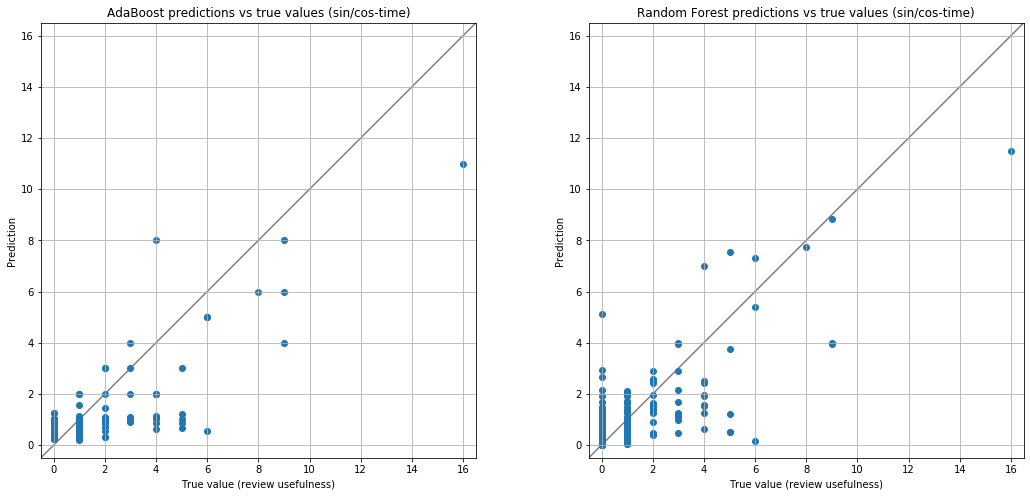

In [69]:
# Plotting scatter, predicted and true values for Random Forest and AdaBoost
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
ax1.set_xlabel('True value (review usefulness)')
ax1.set_ylabel('Prediction')
ax1.set_title('AdaBoost predictions vs true values (sin/cos-time)')
ax1.plot([-0.5,16.5],[-0.5,16.5], 'k-', alpha=0.5, zorder=0)
ax1.set_aspect('equal')
ax1.set_ylim(-0.5,16.5)
ax1.set_xlim(-0.5,16.5)
ax1.grid()
ax1.scatter(scaler_y.inverse_transform(prediction_table['True value']),scaler_y.inverse_transform(prediction_table['AdaBoostRegressor']))




ax2.set_xlabel('True value (review usefulness)')
ax2.set_ylabel('Prediction')
ax2.set_title('Random Forest predictions vs true values (sin/cos-time)')
ax2.plot([-0.5,16.5],[-0.5,16.5], 'k-', alpha=0.5, zorder=0)
ax2.set_aspect('equal')
ax2.set_ylim(-0.5,16.5)
ax2.set_xlim(-0.5,16.5)
ax2.grid()
ax2.scatter(scaler_y.inverse_transform(prediction_table['True value']),scaler_y.inverse_transform(prediction_table['RandomForestRegressor']))


plt.show()

In [71]:
labels.tail(200).describe()

count    200.000000
mean       1.160000
std        2.084738
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       16.000000
Name: random_reviews_useful, dtype: float64

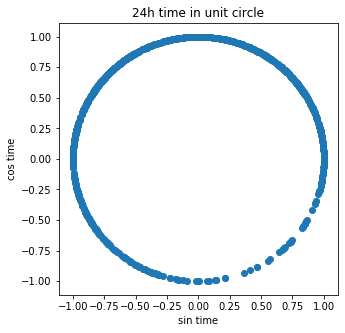

In [0]:
#Plotting sin and cos time
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('sin time')
ax.set_ylabel('cos time')
ax.set_title('24h time in unit circle')
ax.scatter(joined_df['sin_time'],joined_df['cos_time'])

plt.show()

### Testing for overfitting - error in train set - to be compared with train data scores

In [0]:
prediction_table = testDifferentClassifiers(X_train_scaled, X_train_scaled, y_train_scaled, y_train_scaled, modelsToTest)
# Adding dummy guess to prediction table
prediction_table["--Average value from training data--"] = np.mean(y_train_scaled)
# prediction_table["Train Y Median"] = np.median(y_train_scaled)


scores = metricsRegression(prediction_table)

scores = scores.sort_values(by=['Mean squared error'], ascending=False)

scores_sin_cos_train = scores.copy()
scores_sin_cos_train.drop(['R2 score','Explained variance'],axis=1, inplace=True)
scores_sin_cos_train.rename(columns={'Mean squared error':'MSE sin/cos-time training'}, inplace=True)


#createGraphsFromScores(scores)
print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16% (1 of 6) |####                      | Elapsed Time: 0:00:00 ETA:   0:00:02/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50% (3 of 6) |#############             | Elapsed Time: 0:00:02 ETA:   0:00:03/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel impo

Model,Explained variance,Mean squared error,R2 score
--Average value from training data--,0,1,0
LinearRegression,0.33,0.68,0.32
SVM regressor - RBF kernel,0.45,0.56,0.44
DecisionTreeRegressor,0.9,0.1,0.9
RandomForestRegressor,0.92,0.082,0.92
AdaBoostRegressor,0.99,0.013,0.99
SVM regressor - linear,1,2.5e-09,1



### Plotting training and testing error - adaboost and decision tree number of trees
Done on sin and cost time dataset

In [0]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# X_train = train_padded
# y_train = train_labels
X = np.array(features)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAINING_PORTITION, random_state=None, shuffle=False)

y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)

results_df = pd.DataFrame()

for number_trees in range(1,50,2):

  modelsToTest=[
    # ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
    # ("LinearRegression", sklearn.linear_model.LinearRegression(), 0.5),
    # ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
    # # ("Perceptron", sklearn.linear_model.Perceptron()),
    # # ("KNeighborsClassifier", KNeighborsClassifier(3)),
    # ("SVM regressor - linear", LinearSVR()), 
    # ("SVM regressor - RBF kernel", SVR(kernel='rbf')),
    # # ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=number_trees,min_samples_split=10)),
    # ("RandomForestRegressor",RandomForestRegressor(n_estimators=1000)),
    # # ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
    ("AdaBoostRegressor", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=number_trees), n_estimators=50)),
    # # ("GaussianNB", GaussianNB()),
    # # #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis())
  ]

  # MSE from test
  prediction_table_test = testDifferentClassifiers(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, modelsToTest)
  scores_test = metricsRegression(prediction_table_test)
  scores_test = scores_test.sort_values(by=['Mean squared error'], ascending=False)
  scores_test.drop(['R2 score','Explained variance'],axis=1,inplace=True)
  scores_test["Number of trees"] = number_trees
  scores_test["Train or test"] = "Test"

  # MSE from train
  prediction_table_train = testDifferentClassifiers(X_train_scaled, X_train_scaled, y_train_scaled, y_train_scaled, modelsToTest)
  scores_train = metricsRegression(prediction_table_train)
  scores_train = scores_train.sort_values(by=['Mean squared error'], ascending=False)
  scores_train.drop(['R2 score','Explained variance'],axis=1,inplace=True)
  scores_train["Number of trees"] = number_trees
  scores_train["Train or test"] = "Train"

  frames = [results_df, scores_test, scores_train]

  results_df = pd.concat(frames)

#print_scoretable(scores, columns=['Explained variance','Mean squared error','R2 score'])

N/A% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X_train.shape: (800, 1088), y_train.shape: (800, 1)


100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/

In [0]:
results_df

,Model,Mean squared error,Number of trees,Train or test
1,AdaBoostRegressor,7.186353,1,Test
0,DecisionTreeRegressor,0.258295,1,Test
1,AdaBoostRegressor,5.968451,1,Train
0,DecisionTreeRegressor,0.685226,1,Train
1,AdaBoostRegressor,0.715833,3,Test
...,...,...,...,...
1,AdaBoostRegressor,0.003712,47,Train
0,DecisionTreeRegressor,0.282454,49,Test
1,AdaBoostRegressor,0.170060,49,Test
0,DecisionTreeRegressor,0.034848,49,Train


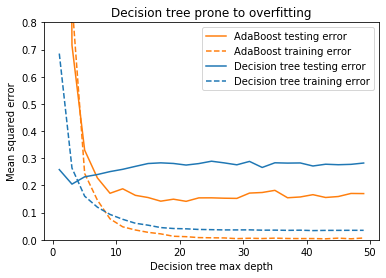

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#fig.set_size(10,10)

ax.set_xlabel('Decision tree max depth')
ax.set_ylabel('Mean squared error')
ax.set_title('Decision tree prone to overfitting')

ax.plot(results_df.loc[(results_df['Model'] == 'AdaBoostRegressor') & (results_df['Train or test'] == 'Test'), 'Number of trees'],results_df.loc[(results_df['Model'] == 'AdaBoostRegressor') & (results_df['Train or test'] == 'Test'), 'Mean squared error' ] ,
        label='AdaBoost testing error', color='#FF7F0E')
ax.plot(results_df.loc[(results_df['Model'] == 'AdaBoostRegressor') & (results_df['Train or test'] == 'Train'), 'Number of trees'],results_df.loc[(results_df['Model'] == 'AdaBoostRegressor') & (results_df['Train or test'] == 'Train'), 'Mean squared error' ] ,
        label='AdaBoost training error', linestyle='dashed',color='#FF7F0E')

ax.plot(results_df.loc[(results_df['Model'] == 'DecisionTreeRegressor') & (results_df['Train or test'] == 'Test'), 'Number of trees'],results_df.loc[(results_df['Model'] == 'DecisionTreeRegressor') & (results_df['Train or test'] == 'Test'), 'Mean squared error' ] ,
        label='Decision tree testing error', color='#1F77B4')

ax.plot(results_df.loc[(results_df['Model'] == 'DecisionTreeRegressor') & (results_df['Train or test'] == 'Train'), 'Number of trees'],results_df.loc[(results_df['Model'] == 'DecisionTreeRegressor') & (results_df['Train or test'] == 'Train'), 'Mean squared error' ] ,
        label='Decision tree training error', linestyle='dashed', color='#1F77B4')

plt.ylim(0,0.8)

plt.legend()

plt.show()

### Joining results from various different datasets

In [0]:
scores_basecase
scores_basecase_pca
scores_datesplit
scores_sin_cos_time
scores_sin_cos_train

In [0]:
scores_basecase_pca

,Model,MSE basecase with PCA
3,DecisionTreeRegressor,0.895581
0,LinearRegression,0.400921
6,--Average value from training data--,0.394561
4,RandomForestRegressor,0.354815
5,AdaBoostRegressor,0.350620
2,SVM regressor - RBF kernel,0.344657
1,SVM regressor - linear,0.332614


In [0]:
scores_datesplit

,Model,MSE date column split
1,SVM regressor - linear,1.387632
0,LinearRegression,0.505322
6,--Average value from training data--,0.394561
2,SVM regressor - RBF kernel,0.317761
3,DecisionTreeRegressor,0.251092
4,RandomForestRegressor,0.166375
5,AdaBoostRegressor,0.143936


In [0]:
all_results = scores_basecase.join([scores_basecase_pca.drop(['Model'],axis=1),
                                    scores_datesplit.drop(['Model'],axis=1),scores_sin_cos_time.drop(['Model'],axis=1),
                                    scores_sin_cos_train.drop(['Model'],axis=1)])
all_results = all_results.sort_values(by=['MSE basecase'], ascending=True)
print_scoretable(all_results, columns=all_results.columns[1:])

Model,MSE basecase,MSE basecase with PCA,MSE date column split,MSE sin/cos-time,MSE sin/cos-time training
AdaBoostRegressor,0.15,0.37,0.14,0.15,0.013
RandomForestRegressor,0.16,0.35,0.17,0.17,0.082
DecisionTreeRegressor,0.24,0.88,0.24,0.25,0.1
SVM regressor - RBF kernel,0.32,0.34,0.32,0.32,0.56
--Average value from training data--,0.39,0.39,0.39,0.39,1
LinearRegression,0.56,0.4,0.51,0.5,0.68
SVM regressor - linear,1.4,0.35,1.4,1.4,2.5e-09


### Random forest feature importancies and one tree

In [0]:
# Instantiating the model
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_train_scaled, y_train_scaled)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:

#Visualising one tree
feature_list = features.columns

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list,  rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


from IPython.display import Image
Image("tree.png", width=5000,height=5000)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#Code from here https://explained.ai/rf-importance/
# Also scikit improving https://scikit-learn.org/dev/auto_examples/inspection/plot_permutation_importance.html

from sklearn.base import clone
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=True)
    return I

rf_100 = RandomForestRegressor(n_estimators=100)

X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=features.columns) 
y_train_scaled_df = pd.DataFrame(data=y_train_scaled)


importances = dropcol_importances(rf_100, X_train_scaled_df, y_train_scaled_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


AttributeError: ignored

In [0]:
type(X_train_scaled_df)